In [1]:
###  You'll need to install : 'pyabf' and 'scipy'  ###
import pyabf
from scipy.ndimage import gaussian_filter1d

from matplotlib import pyplot as plt
import numpy as np

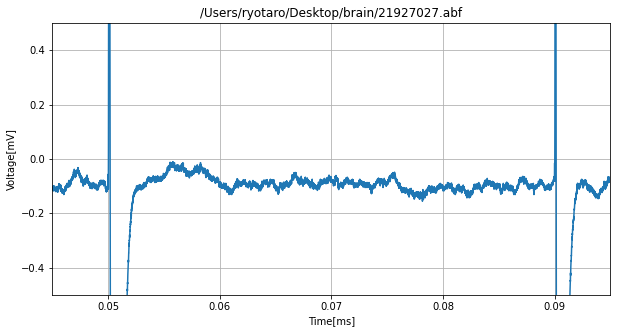

In [2]:
sampling_freq = 200000
sampling_interval = 5.0 * 10**-6

raw_path = "/Users/ryotaro/Desktop/brain/21927027.abf"
#raw_path = "/Users/ryotaro/Desktop/brain/21902001.abf"

abf = pyabf.ABF(raw_path)
time, data = abf.sweepX, abf.sweepY
dataset = np.zeros((len(time), 2))

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("Time[ms]")
ax.set_ylabel("Voltage[mV]")
ax.set_title(raw_path)

plt.grid()
plt.plot(time, data)
plt.axis([0.045, 0.095, -0.5, 0.5])
plt.show()

In [3]:
sweep_num = len(abf.sweepList)
sweep_size = len(time)
fs = 500

sweep count :  7
sweep size :  206450
-3dB cutoff freq[Hz] :  500


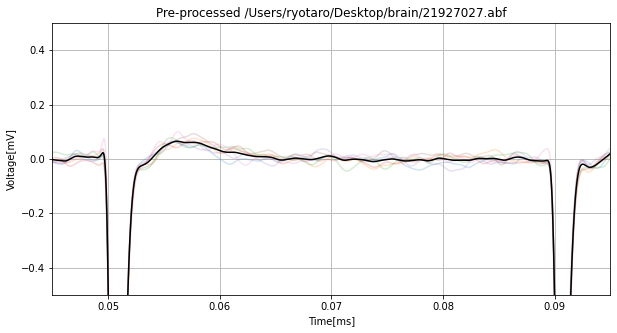

In [4]:
print("sweep count : ", sweep_num)
print("sweep size : ", sweep_size)
print("-3dB cutoff freq[Hz] : ", fs)

## 0合わせ時の計算用変数(default : 0[ms] -> 0.04[ms] )
ave_sampling_range = 0.04
dt_top, dt_bottom = 0, int(ave_sampling_range*sampling_freq)

fig, ax = plt.subplots(figsize=(10, 5))
lowpass_list = np.empty((sweep_num, sweep_size), dtype=np.float64)
for sweepNumber in abf.sweepList:
    #スイープデータの取得
    abf.setSweep(sweepNumber)
    dataX = abf.sweepX
    dataY = abf.sweepY
    
    #基準合わせ
    ave = np.sum(dataY[dt_top:dt_bottom]) / len(dataY[dt_top:dt_bottom])
    dataY = dataY + np.abs(ave)
    
    #ガウシアンローパスフィルタ
    sigma = sweep_size / (fs*2*np.pi)
    data_lowpass = gaussian_filter1d(dataY, sigma)
    lowpass_list[sweepNumber] = data_lowpass
    
    #各スイープの描画
    plt.plot(dataX, data_lowpass, alpha=0.2)

#加算平均
addave = (np.sum(lowpass_list, axis=0) / sweep_num)

#最終出力波形の描画
plt.plot(dataX, addave, color="black")
plt.grid()
plt.axis([0.045, 0.095, -0.5, 0.5])
ax.set_xlabel("Time[ms]")
ax.set_ylabel("Voltage[mV]")
ax.set_title("Pre-processed "+raw_path)
plt.show()